Imports & Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\keert\Desktop\Git Projects\construction-risk-agent\data\project_data.csv")

df.head()


,planned_duration_days,days_elapsed,actual_progress_pct,labor_availability,subcontractor_delay,weather_delay_days,material_delay_days,cost_spent_pct,change_orders,delay_risk,cost_overrun_risk
0,192,244,81.382053,0.702510,0,29,35,82.154241,8,High,Low
1,525,264,83.694470,0.796459,0,12,32,36.398497,14,High,Low
2,360,38,44.678682,0.789707,0,1,23,78.050176,0,High,High
3,196,103,56.896421,0.831311,1,3,38,69.578766,13,High,Low
4,161,521,31.580528,0.547631,0,27,33,91.686009,0,High,High


Basic Dataset Overview

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   planned_duration_days  500 non-null    int64  
 1   days_elapsed           500 non-null    int64  
 2   actual_progress_pct    500 non-null    float64
 3   labor_availability     500 non-null    float64
 4   subcontractor_delay    500 non-null    int64  
 5   weather_delay_days     500 non-null    int64  
 6   material_delay_days    500 non-null    int64  
 7   cost_spent_pct         500 non-null    float64
 8   change_orders          500 non-null    int64  
 9   delay_risk             500 non-null    object 
 10  cost_overrun_risk      500 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 43.1+ KB


In [7]:
df.describe()


,planned_duration_days,days_elapsed,actual_progress_pct,labor_availability,subcontractor_delay,weather_delay_days,material_delay_days,cost_spent_pct,change_orders
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,399.844000,299.868000,53.855801,0.743650,0.532000,14.822000,22.44600,60.974814,7.308000
std,183.472472,165.885909,24.852040,0.139994,0.499475,8.850253,12.83716,22.818162,4.368903
min,91.000000,30.000000,10.020190,0.500166,0.000000,0.000000,0.00000,20.035423,0.000000
25%,239.750000,155.750000,32.592553,0.621806,0.000000,7.000000,11.00000,41.718697,4.000000
50%,396.000000,287.000000,54.909145,0.742654,1.000000,15.000000,22.50000,61.213721,7.000000
75%,561.250000,441.000000,75.523816,0.858014,1.000000,22.250000,34.00000,81.690572,11.000000
max,717.000000,596.000000,94.945047,0.997740,1.000000,29.000000,44.00000,99.963513,14.000000


Delay Risk Distribution

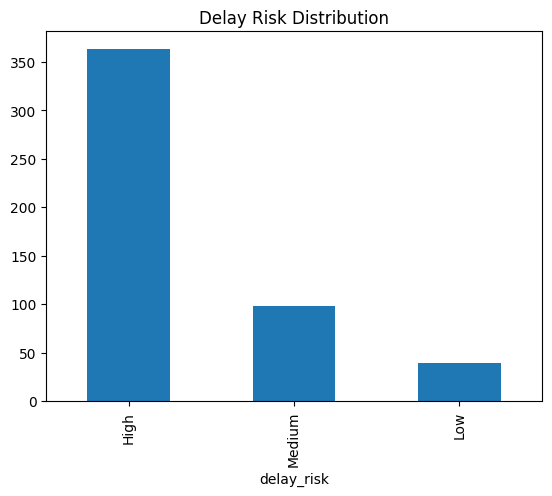

In [8]:
df["delay_risk"].value_counts().plot(kind="bar", title="Delay Risk Distribution")
plt.show()


Cost Overrun Risk Distribution

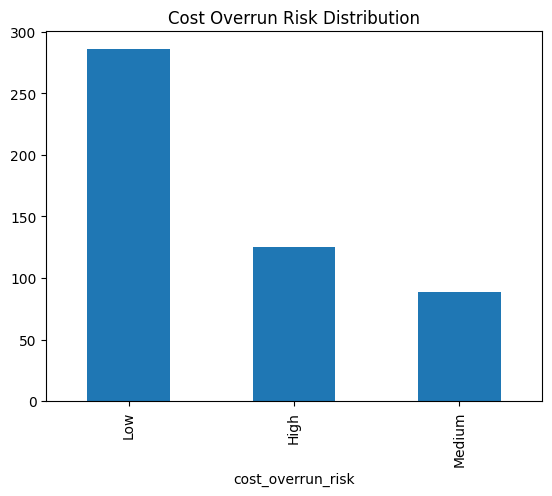

In [9]:
df["cost_overrun_risk"].value_counts().plot(kind="bar", title="Cost Overrun Risk Distribution")
plt.show()


Progress vs Delay Risk (Core Insight)

In [10]:
df.groupby("delay_risk")["actual_progress_pct"].mean()


delay_risk
High      51.342797
Low       62.745503
Medium    59.626433
Name: actual_progress_pct, dtype: float64

Cost Spent vs Cost Risk (Critical Check)

In [11]:
df.groupby("cost_overrun_risk")["cost_spent_pct"].mean()


cost_overrun_risk
High      80.747249
Low       50.412907
Medium    67.145049
Name: cost_spent_pct, dtype: float64

External Disruptions vs Delay Risk

In [12]:
df.groupby("delay_risk")[["material_delay_days", "weather_delay_days"]].mean()


,material_delay_days,weather_delay_days
delay_risk,,
High,26.856749,14.898072
Low,9.820513,4.410256
Medium,11.132653,18.683673


Change Orders vs Cost Risk

In [13]:
df.groupby("cost_overrun_risk")["change_orders"].mean()


cost_overrun_risk
High      7.128000
Low       7.437063
Medium    7.146067
Name: change_orders, dtype: float64

## EDA Summary

- High delay risk projects show significantly lower average progress and higher material delays.
- Cost overrun risk increases with higher early budget consumption and frequent change orders.
- Risk labels align well with construction domain intuition.
- Dataset is suitable for supervised machine learning.
